In [2]:
# Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Displaying the Top 5 rows in Data Set
hr_data = pd.read_csv('Attrition.csv')
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Check if any Column's has NA or Missing Values
hr_data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
#Shape of the Data
hr_data.shape

(1470, 35)

In [7]:
#Data Types of Columns
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#Show how much % of employees left the organization
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0, 0.5, 'Count')

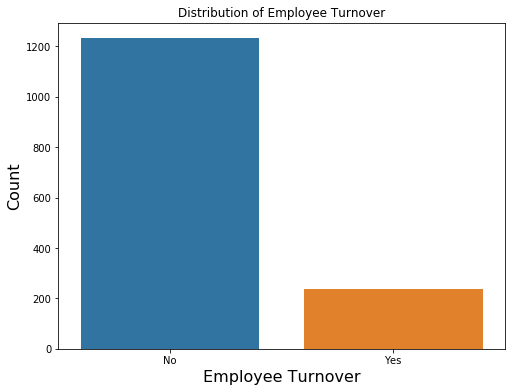

In [9]:
plt.figure(figsize=(8,6))
Attrition=hr_data.Attrition.value_counts()
sb.barplot(x=Attrition.index ,y=Attrition.values)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

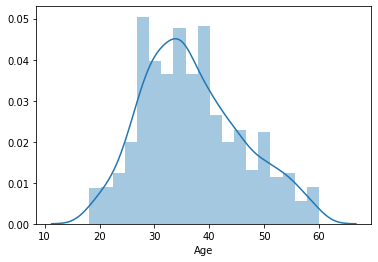

In [12]:
sb.distplot(hr_data['Age'])

Age is fairly normally distributed with average Age around 35. Most of the employees in the range 25 to 45

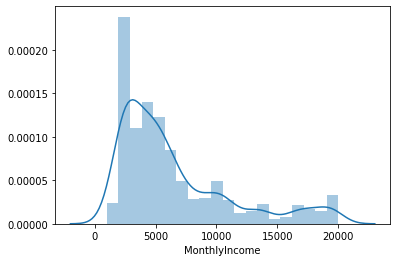

In [11]:
sb.distplot(hr_data['MonthlyIncome'])

Most the employees have their monthly income around $5000 and is distribution Rightly Skewed

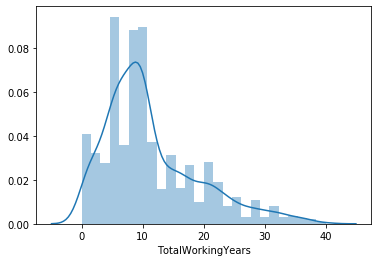

In [13]:
sb.distplot(hr_data['TotalWorkingYears'])


Total Working Years is also right skewed similar to monthly income

In [14]:
#Method that plot density plots on the columns passed as input
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sb.kdeplot(hr_data.loc[(hr_data['Attrition'] == 'No'),var] , color='b',shade=True, label='no Attrition') 
    ax=sb.kdeplot(hr_data.loc[(hr_data['Attrition'] == 'Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

In [15]:
numerical_df=hr_data.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)

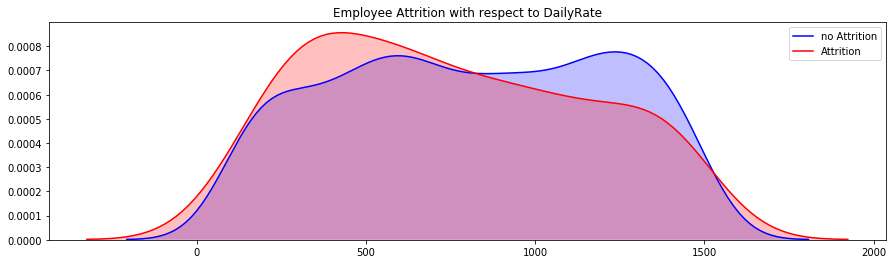

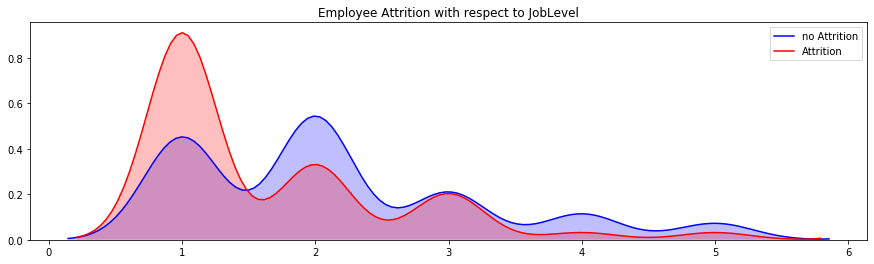

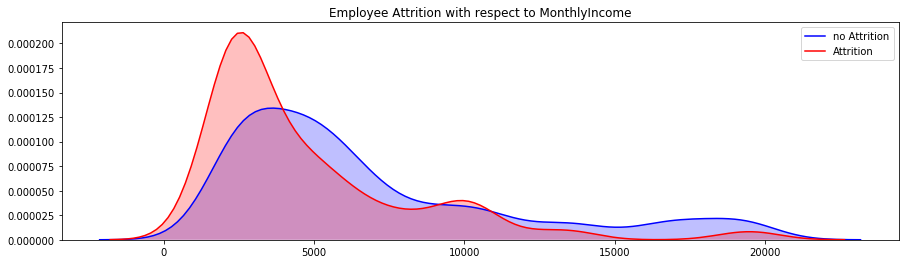

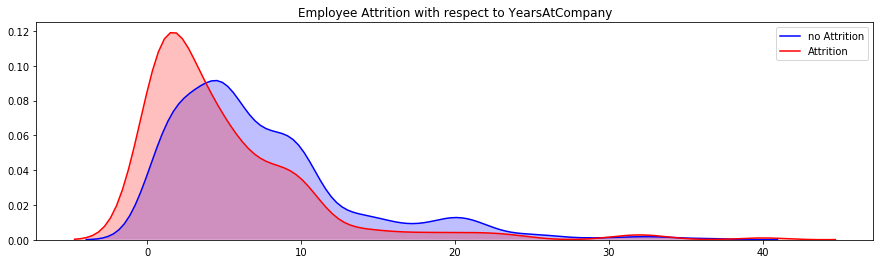

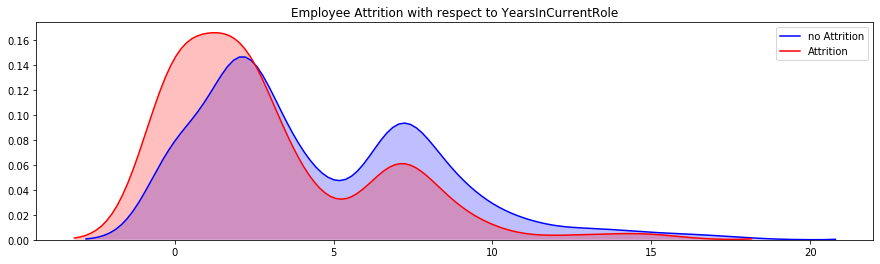

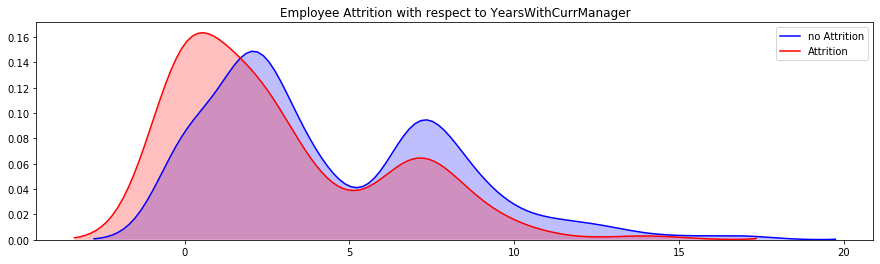

In [16]:
#Plotting KDE plots
for n in numeric_cols_kdeplot:
    kdePlot(n)

Attrition is high with Employees having joblevel as 1.

Employees whose monthly income is below $5000 have high attrition.

Employees who worked in the company around 0 to 1 years have high attrition.

Employees who are in current role for around 0 to 4 years have high attrition.

In [18]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']
def Bar_plots(var):
    col=pd.crosstab(hr_data[var],hr_data.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

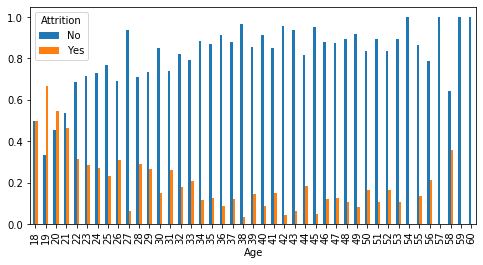

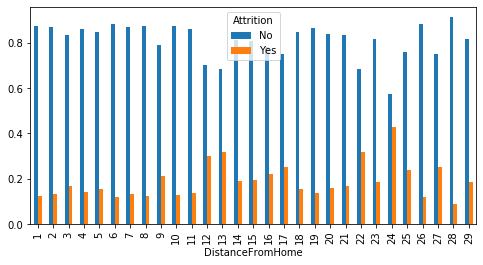

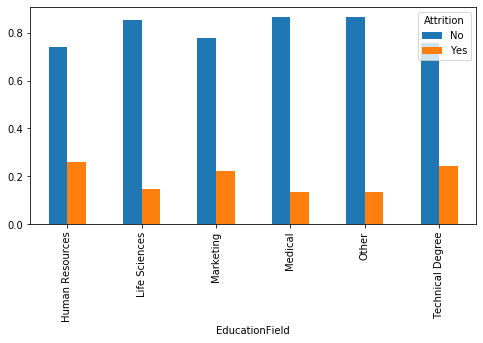

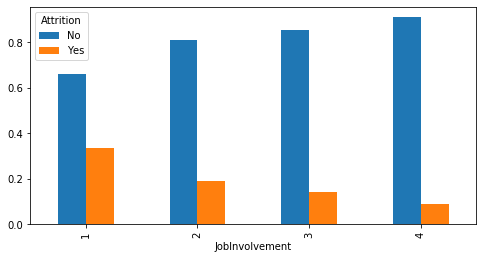

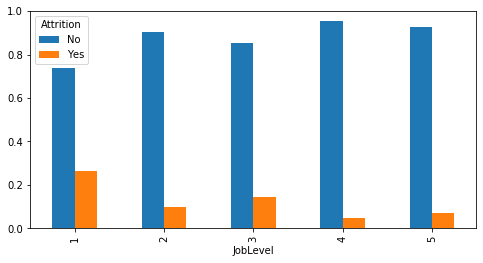

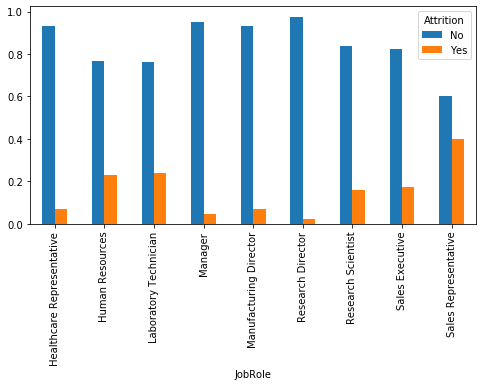

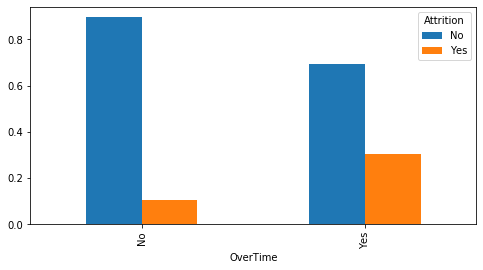

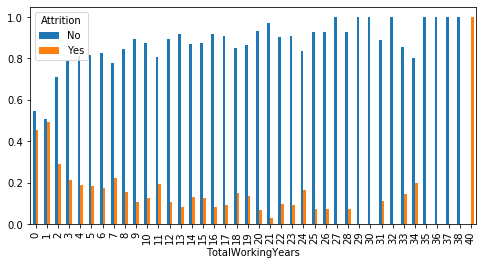

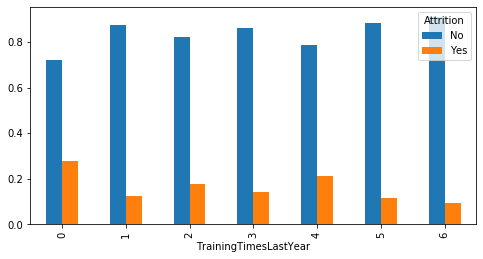

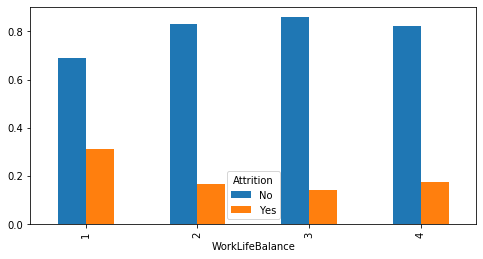

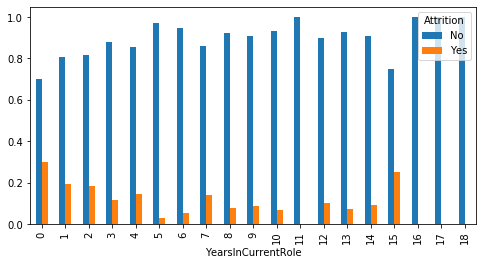

In [19]:
for col in BarPlot_columns:
    Bar_plots(col)

Attrition is very high with employees having age in between 18 to 22. These might be due to students who are doing intership or small contract jobs

Attrition is more when the distance of office is more from home

Attrition is high with employee's education in the field of Human Resources, Marketing and Technical Degree that other fields

Attrition is high with employee's whose job role is in the field of Human Resources, Sales Representative, Laboratory Technician.

Employees who work over time have high attrition than employees who did not do over time

Employees who are working less than 2 years have more attrition

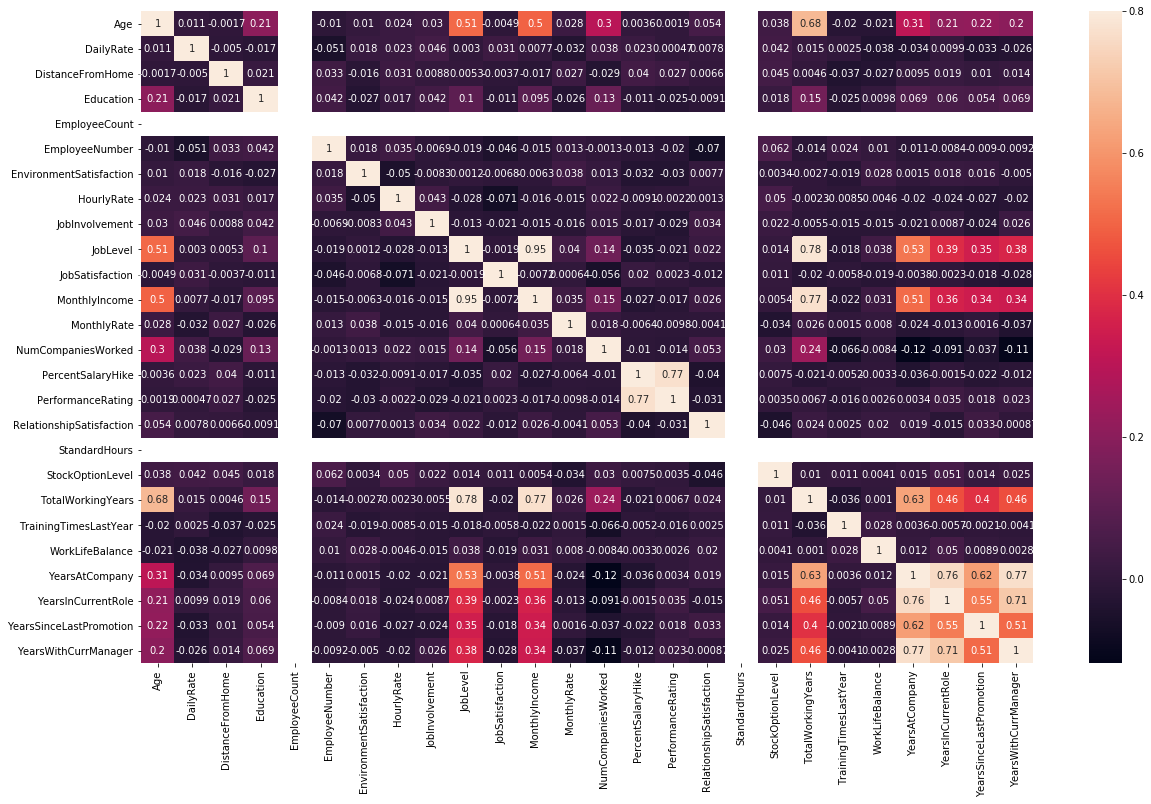

In [20]:
corr_matrix = hr_data.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_matrix,vmax=0.8, annot=True)

In [21]:
hr_data=hr_data.drop(['EmployeeCount', 'StandardHours','EmployeeNumber'], axis=1)